In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

In [2]:
data = pd.read_csv('dataSerieRNdf.csv')

In [3]:
data['diff'] = data.real - data.pred

In [4]:
data

,real,pred,diff
0,6200.376900,6503.854988,-303.478088
1,6250.402251,6223.516685,26.885566
2,6552.748635,6228.613738,324.134897
3,6124.770458,6328.756222,-203.985764
4,6343.576606,6343.064936,0.511670
...,...,...,...
3018,5128.181653,5022.920252,105.261401
3019,4664.154912,4912.009015,-247.854103
3020,4815.533061,4596.671417,218.861644
3021,4812.097524,5242.720324,-430.622800


# Shapiro-Wilk test: testa o quão normal são os dados, é dado por uma estatística W no intervalo [0,1], quanto mais normal mais perto de 1.
Null Hypothesis (𝐻0): The sample is drawn from a normally distributed population.
Alternative Hypothesis (𝐻1​): The sample is not drawn from a normally distributed population.
A low 𝑝-value (typically 𝑝 < 0.05) indicates that the null hypothesis can be rejected, suggesting that the data is not normally distributed.
A high 𝑝-value suggests that there is no evidence to reject the null hypothesis of normality.
Os p-avlores deram todos 0, com o valor de W entre cada gráfico QQ.

ShapiroResult(statistic=0.742136538028717, pvalue=0.0)


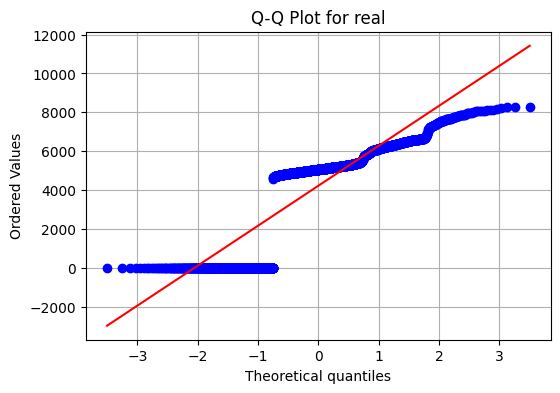

ShapiroResult(statistic=0.7511732578277588, pvalue=0.0)


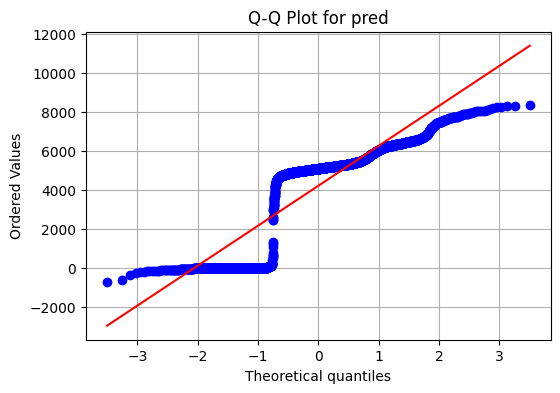

ShapiroResult(statistic=0.517214298248291, pvalue=0.0)


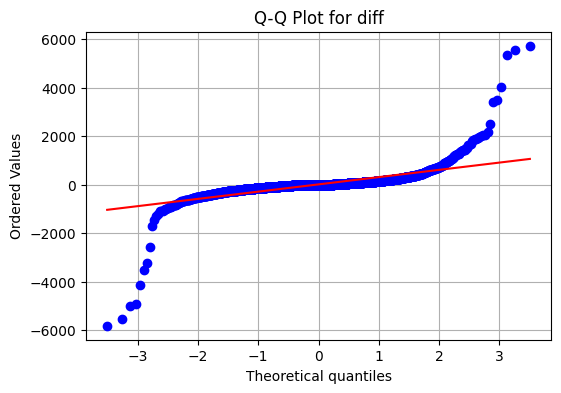

{'real': ('not normal', 0.0),
 'pred': ('not normal', 0.0),
 'diff': ('not normal', 0.0)}

In [5]:
def check_normality(column):
    shapiro_test = stats.shapiro(column)
    print(shapiro_test)
    p_value = shapiro_test.pvalue
    normality = "normal" if p_value > 0.05 else "not normal"

    plt.figure(figsize=(6, 4))
    stats.probplot(column, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column.name}')
    plt.grid()
    plt.show()

    return normality, p_value

normality_results = {}
for column in data.columns[0:]:
    normality_results[column] = check_normality(data[column])

normality_results


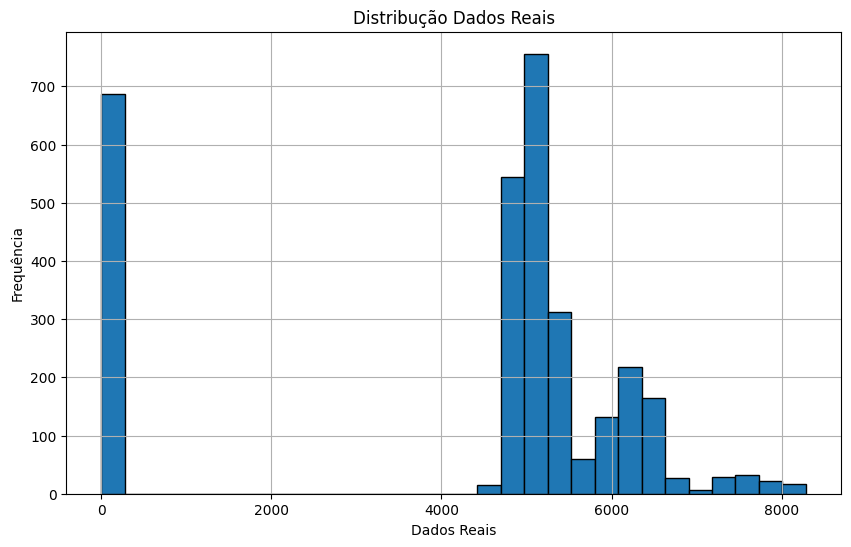

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(data.real, bins=30, edgecolor='black')
plt.title('Distribução Dados Reais')
plt.xlabel('Dados Reais')
plt.ylabel('Frequência')
plt.grid()
plt.show()

In [7]:
media_pob_dr = np.mean(data.real)
media_pob_dr

4230.728233860073

In [8]:
std_pob_dr = np.std(data.real)
std_pob_dr

2379.975012664679

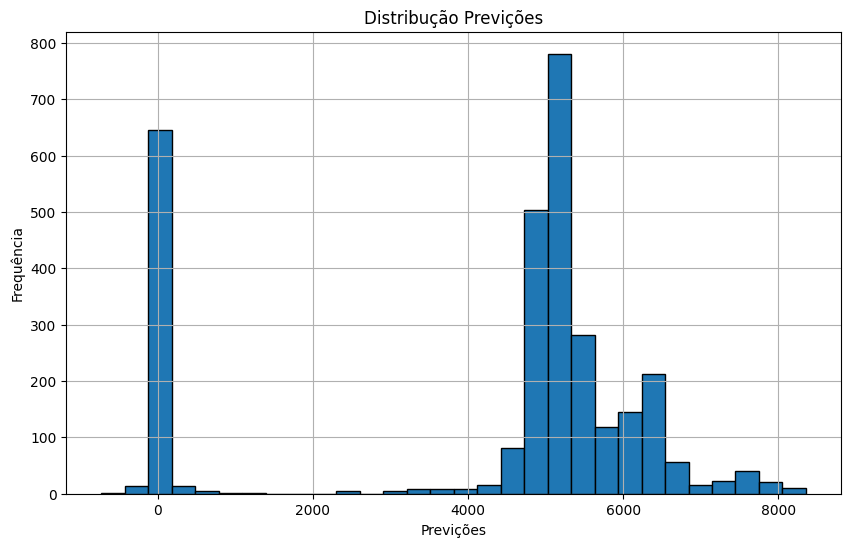

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(data.pred, bins=30, edgecolor='black')
plt.title('Distribução Previções')
plt.xlabel('Previções')
plt.ylabel('Frequência')
plt.grid()
plt.show()

In [10]:
media_pob_dp = np.mean(data.pred)
media_pob_dp

4217.481674992169

In [11]:
std_pob_dp = np.std(data.pred)
std_pob_dp

2358.838048269313

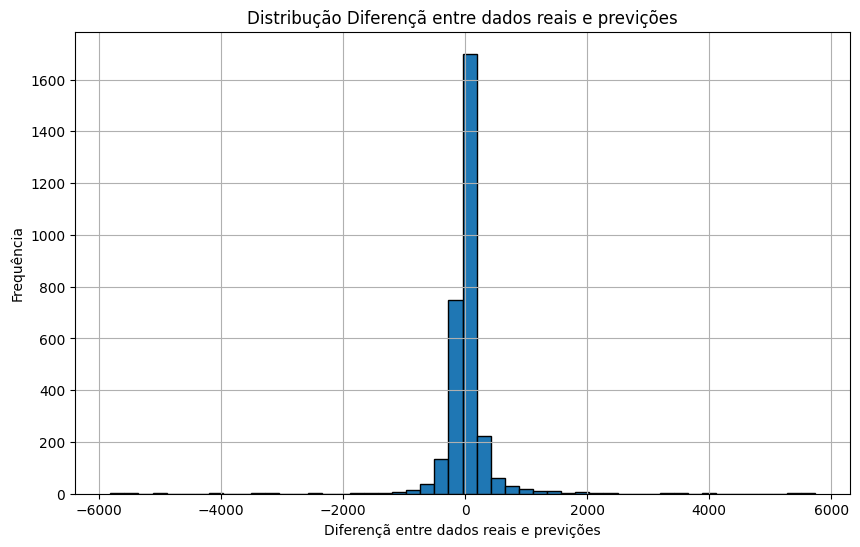

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(data['diff'], bins=50, edgecolor='black')
plt.title('Distribução Diferençã entre dados reais e previções')
plt.xlabel('Diferençã entre dados reais e previções')
plt.ylabel('Frequência')
plt.grid()
plt.show()

In [13]:
media_pob_diff = np.mean(data['diff'])
media_pob_diff

13.246558867903337

In [14]:
std_pob_diff = np.std(data['diff'])
std_pob_diff

417.38271629624995

# Dados não normais, então aplicar bootstrap para verificar a distribuição das médias dos samples e verificar que pela clt converge para uma distribuição normal.

90% confidence interval: Lower limit = 1.5117867378040366, Upper limit = 25.58546746967846
95% confidence interval: Lower limit = -1.008377823726151, Upper limit = 27.93395910727134
98% confidence interval: Lower limit = -2.991479871350487, Upper limit = 31.673001632776437


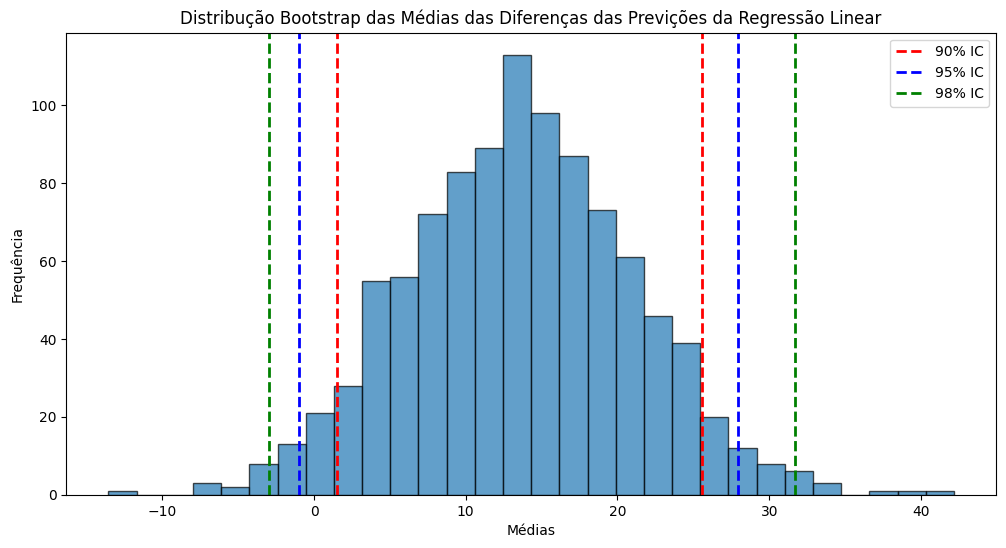

In [15]:
n_bootstrap_samples = 1000

bootstrap_means = np.zeros(n_bootstrap_samples)

for i in range(n_bootstrap_samples):
    bootstrap_sample = np.random.choice(data['diff'], size=len(data['diff']), replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)

ci_90 = np.percentile(bootstrap_means, [5, 95])
ci_95 = np.percentile(bootstrap_means, [2.5, 97.5])
ci_98 = np.percentile(bootstrap_means, [1, 99])

print(f"90% confidence interval: Lower limit = {ci_90[0]}, Upper limit = {ci_90[1]}")
print(f"95% confidence interval: Lower limit = {ci_95[0]}, Upper limit = {ci_95[1]}")
print(f"98% confidence interval: Lower limit = {ci_98[0]}, Upper limit = {ci_98[1]}")

plt.figure(figsize=(12, 6))
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(ci_90[0], color='red', linestyle='dashed', linewidth=2, label='90% IC')
plt.axvline(ci_90[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci_95[0], color='blue', linestyle='dashed', linewidth=2, label='95% IC')
plt.axvline(ci_95[1], color='blue', linestyle='dashed', linewidth=2)
plt.axvline(ci_98[0], color='green', linestyle='dashed', linewidth=2, label='98% IC')
plt.axvline(ci_98[1], color='green', linestyle='dashed', linewidth=2)
plt.title('Distribução Bootstrap das Médias das Diferenças das Previções da Regressão Linear')
plt.xlabel('Médias')
plt.ylabel('Frequência')
plt.legend()
plt.show()


# CLT ( a média da média dos samples converge para uma normal) e sample size grande (n = 3023) garante a aplicação do t-score abaixo

90% prediction interval: Lower limit = -673.724646338595, Upper limit = 700.2177640744017
95% prediction interval: Lower limit = -805.4070710494988, Upper limit = 831.9001887853054
98% prediction interval: Lower limit = -958.5675577018648, Upper limit = 985.0606754376714


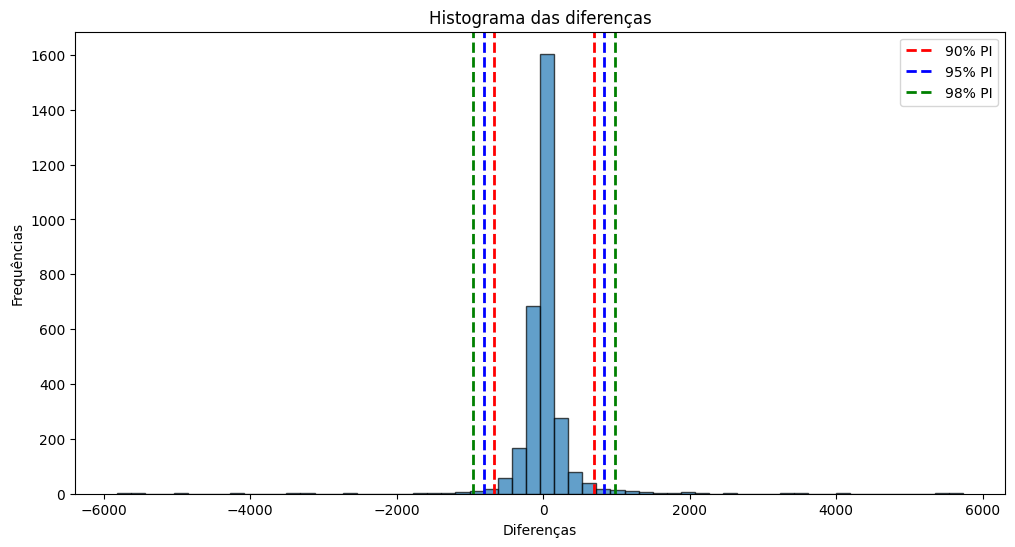

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def prediction_interval(column, confidence):
    n = len(column)
    mean = np.mean(column)
    std_dev = np.std(column, ddof=1)

    critical_value = stats.t.ppf((1 + confidence) / 2., n-1)

    margin_of_error = critical_value * std_dev * np.sqrt(1 + 1/n)

    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return lower_bound, upper_bound


pi_90 = np.zeros(2)
pi_95 = np.zeros(2)
pi_98 = np.zeros(2)

pi_90[0], pi_90[1] = prediction_interval(data['diff'], 0.90)
pi_95[0], pi_95[1] = prediction_interval(data['diff'], 0.95)
pi_98[0], pi_98[1] = prediction_interval(data['diff'], 0.98)

print(f"90% prediction interval: Lower limit = {pi_90[0]}, Upper limit = {pi_90[1]}")
print(f"95% prediction interval: Lower limit = {pi_95[0]}, Upper limit = {pi_95[1]}")
print(f"98% prediction interval: Lower limit = {pi_98[0]}, Upper limit = {pi_98[1]}")

plt.figure(figsize=(12, 6))
plt.hist(data['diff'], bins=60, edgecolor='k', alpha=0.7)
plt.axvline(pi_90[0], color='red', linestyle='dashed', linewidth=2, label='90% PI')
plt.axvline(pi_90[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(pi_95[0], color='blue', linestyle='dashed', linewidth=2, label='95% PI')
plt.axvline(pi_95[1], color='blue', linestyle='dashed', linewidth=2)
plt.axvline(pi_98[0], color='green', linestyle='dashed', linewidth=2, label='98% PI')
plt.axvline(pi_98[1], color='green', linestyle='dashed', linewidth=2)
plt.title('Histograma das diferenças')
plt.xlabel('Diferenças')
plt.ylabel('Frequências')
plt.legend()
plt.show()


90% prediction interval: Lower limit = -1454.22198007611, Upper limit = 1587.5655059631422
95% prediction interval: Lower limit = -1746.6185420569789, Upper limit = 1879.962067944011
98% prediction interval: Lower limit = -2087.282214889024, Upper limit = 2220.6257407760563


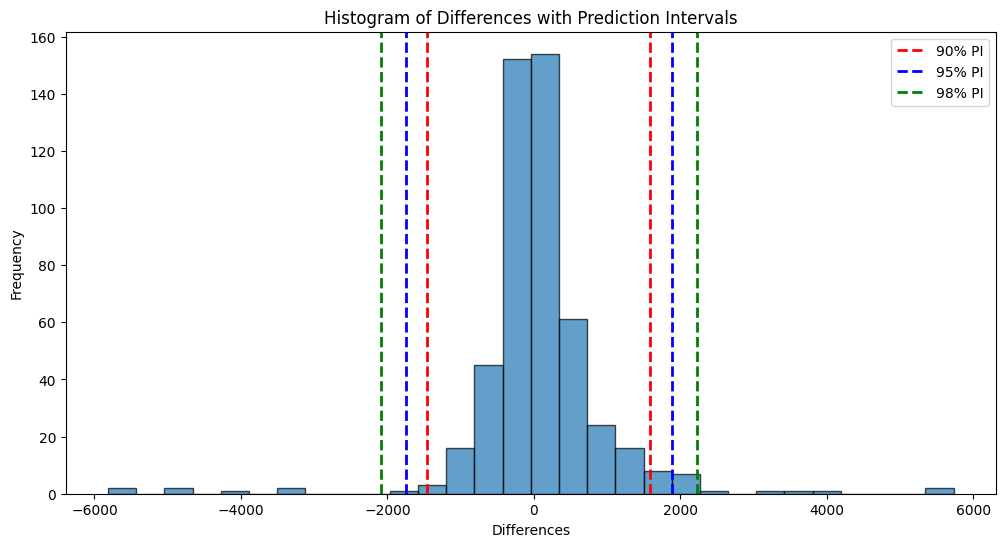

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def prediction_interval(column, confidence):
    n = len(column)
    mean = np.mean(column)
    std_dev = np.std(column, ddof=1)

    critical_value = stats.t.ppf((1 + confidence) / 2., n-1)

    margin_of_error = critical_value * std_dev * np.sqrt(1 + 1/n)

    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return lower_bound, upper_bound


pi_90 = np.zeros(2)
pi_95 = np.zeros(2)
pi_98 = np.zeros(2)

pi_90[0], pi_90[1] = prediction_interval(data['diff'][2523:3023], 0.90)
pi_95[0], pi_95[1] = prediction_interval(data['diff'][2523:3023], 0.95)
pi_98[0], pi_98[1] = prediction_interval(data['diff'][2523:3023], 0.98)

print(f"90% prediction interval: Lower limit = {pi_90[0]}, Upper limit = {pi_90[1]}")
print(f"95% prediction interval: Lower limit = {pi_95[0]}, Upper limit = {pi_95[1]}")
print(f"98% prediction interval: Lower limit = {pi_98[0]}, Upper limit = {pi_98[1]}")

plt.figure(figsize=(12, 6))
plt.hist(data['diff'][2523:3023], bins=30, edgecolor='k', alpha=0.7)
plt.axvline(pi_90[0], color='red', linestyle='dashed', linewidth=2, label='90% PI')
plt.axvline(pi_90[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(pi_95[0], color='blue', linestyle='dashed', linewidth=2, label='95% PI')
plt.axvline(pi_95[1], color='blue', linestyle='dashed', linewidth=2)
plt.axvline(pi_98[0], color='green', linestyle='dashed', linewidth=2, label='98% PI')
plt.axvline(pi_98[1], color='green', linestyle='dashed', linewidth=2)
plt.title('Histogram of Differences with Prediction Intervals')
plt.xlabel('Differences')
plt.ylabel('Frequency')
plt.legend()
plt.show()


90% prediction interval: Lower limit = -427.3235437977096, Upper limit = 402.5457800007865
95% prediction interval: Lower limit = -508.24817802615195, Upper limit = 483.4704142292289
98% prediction interval: Lower limit = -603.3080337480329, Upper limit = 578.53026995111


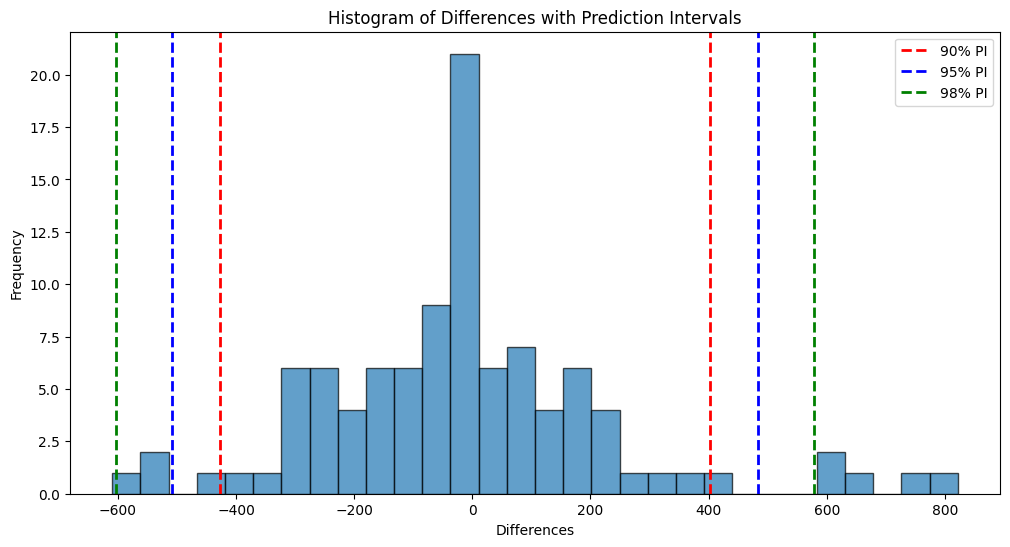

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def prediction_interval(column, confidence):
    n = len(column)
    mean = np.mean(column)
    std_dev = np.std(column, ddof=1)

    critical_value = stats.t.ppf((1 + confidence) / 2., n-1)

    margin_of_error = critical_value * std_dev * np.sqrt(1 + 1/n)

    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return lower_bound, upper_bound


pi_90 = np.zeros(2)
pi_95 = np.zeros(2)
pi_98 = np.zeros(2)

pi_90[0], pi_90[1] = prediction_interval(data['diff'][2523:2623], 0.90)
pi_95[0], pi_95[1] = prediction_interval(data['diff'][2523:2623], 0.95)
pi_98[0], pi_98[1] = prediction_interval(data['diff'][2523:2623], 0.98)

print(f"90% prediction interval: Lower limit = {pi_90[0]}, Upper limit = {pi_90[1]}")
print(f"95% prediction interval: Lower limit = {pi_95[0]}, Upper limit = {pi_95[1]}")
print(f"98% prediction interval: Lower limit = {pi_98[0]}, Upper limit = {pi_98[1]}")

plt.figure(figsize=(12, 6))
plt.hist(data['diff'][2523:2623], bins=30, edgecolor='k', alpha=0.7)
plt.axvline(pi_90[0], color='red', linestyle='dashed', linewidth=2, label='90% PI')
plt.axvline(pi_90[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(pi_95[0], color='blue', linestyle='dashed', linewidth=2, label='95% PI')
plt.axvline(pi_95[1], color='blue', linestyle='dashed', linewidth=2)
plt.axvline(pi_98[0], color='green', linestyle='dashed', linewidth=2, label='98% PI')
plt.axvline(pi_98[1], color='green', linestyle='dashed', linewidth=2)
plt.title('Histogram of Differences with Prediction Intervals')
plt.xlabel('Differences')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## 95% IC

In [19]:
data_pi_95_inf = data[data['diff'] < pi_95[0]]
data_pi_95_inf

,real,pred,diff
51,0.000000,763.742384,-763.742384
173,0.000000,645.444682,-645.444682
265,0.000000,619.635326,-619.635326
1322,0.000000,521.839848,-521.839848
1821,4915.896175,5454.580401,-538.684226
...,...,...,...
2999,4674.464731,5736.829718,-1062.364987
3001,4981.746676,5890.838722,-909.092046
3003,4741.320183,5275.478104,-534.157921
3006,4715.725601,5482.618254,-766.892653


In [20]:
data_pi_95_sup = data[data['diff'] > pi_95[1]]
data_pi_95_sup

,real,pred,diff
143,6348.744326,5837.421315,511.323011
871,5358.809363,12.363491,5346.445872
1011,7396.892615,6884.421194,512.471421
1200,6563.550233,5927.937678,635.612555
1268,6532.731480,5795.380900,737.350580
...,...,...,...
2990,6149.491561,5451.811932,697.679629
2991,6149.800259,4765.899145,1383.901114
3000,4835.124735,3862.234256,972.890479
3013,5019.713217,3396.851642,1622.861575


In [21]:
data_pi_95 = pd.concat([data_pi_95_inf, data_pi_95_sup])
data_pi_95

,real,pred,diff
51,0.000000,763.742384,-763.742384
173,0.000000,645.444682,-645.444682
265,0.000000,619.635326,-619.635326
1322,0.000000,521.839848,-521.839848
1821,4915.896175,5454.580401,-538.684226
...,...,...,...
2990,6149.491561,5451.811932,697.679629
2991,6149.800259,4765.899145,1383.901114
3000,4835.124735,3862.234256,972.890479
3013,5019.713217,3396.851642,1622.861575


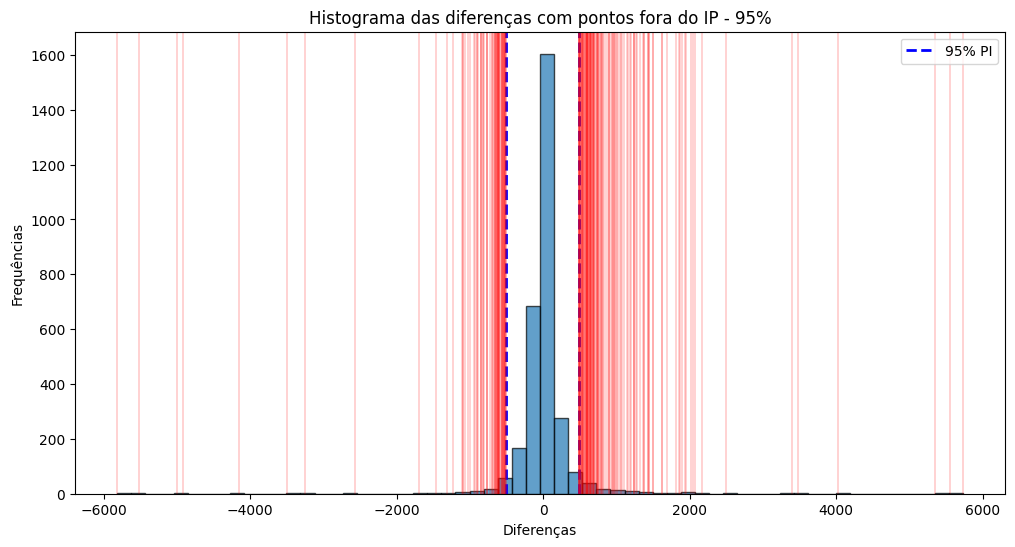

In [22]:
plt.figure(figsize=(12, 6))
plt.hist(data['diff'], bins=60, edgecolor='k', alpha=0.7)
plt.axvline(pi_95[0], color='blue', linestyle='dashed', linewidth=2, label='95% PI')
plt.axvline(pi_95[1], color='blue', linestyle='dashed', linewidth=2)
for d in data_pi_95['diff']:
  plt.axvline(d, color='red', linewidth=0.25)
plt.title('Histograma das diferenças com pontos fora do IP - 95%')
plt.xlabel('Diferenças')
plt.ylabel('Frequências')
plt.legend()
plt.show()

In [23]:
p = len(data_pi_95)/len(data)*100
print('percentual de pontos que caem fora do intervalo de previsão de 95 %:')
print(f'{p} %')


percentual de pontos que caem fora do intervalo de previsão de 95 %:
6.417466093284816 %


In [24]:
outpred500_pi_95 = data_pi_95[(data_pi_95.index >= 2523) & (data_pi_95.index <= 3023)]
outpred500_pi_95

,real,pred,diff
2524,4786.483783,5311.781088,-525.297305
2527,4885.716662,5430.478911,-544.762249
2550,0.000000,609.362075,-609.362075
2643,0.000000,3247.467199,-3247.467199
2667,4778.137468,5369.199381,-591.061913
...,...,...,...
2990,6149.491561,5451.811932,697.679629
2991,6149.800259,4765.899145,1383.901114
3000,4835.124735,3862.234256,972.890479
3013,5019.713217,3396.851642,1622.861575


In [25]:
data['inferior_95'] = data['real'] + pi_95[0]
data['superior_95'] = data['real'] + pi_95[1]
data

,real,pred,diff,inferior_95,superior_95
0,6200.376900,6503.854988,-303.478088,5692.128722,6683.847314
1,6250.402251,6223.516685,26.885566,5742.154073,6733.872665
2,6552.748635,6228.613738,324.134897,6044.500457,7036.219049
3,6124.770458,6328.756222,-203.985764,5616.522280,6608.240872
4,6343.576606,6343.064936,0.511670,5835.328428,6827.047020
...,...,...,...,...,...
3018,5128.181653,5022.920252,105.261401,4619.933475,5611.652067
3019,4664.154912,4912.009015,-247.854103,4155.906734,5147.625326
3020,4815.533061,4596.671417,218.861644,4307.284883,5299.003475
3021,4812.097524,5242.720324,-430.622800,4303.849346,5295.567938


In [26]:
outpred100_pi_95 = data_pi_95[(data_pi_95.index >= 2523) & (data_pi_95.index <= 2623)]
outpred100_pi_95

,real,pred,diff
2524,4786.483783,5311.781088,-525.297305
2527,4885.716662,5430.478911,-544.762249
2550,0.000000,609.362075,-609.362075
2526,5732.918173,5137.313989,595.604184
2531,6033.178669,5286.032125,747.146544
2532,6363.129133,5541.335220,821.793913
2534,6213.277682,5589.296948,623.980734
2604,7512.353897,6836.293135,676.060762


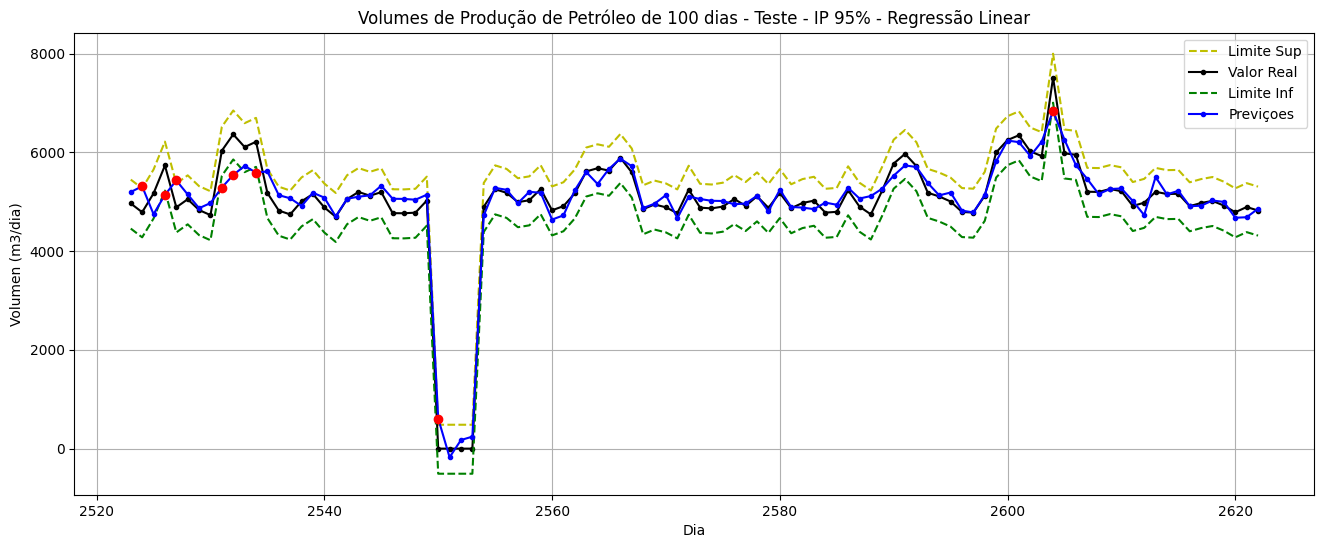

In [27]:
plt.figure(figsize=(16,6))
plt.plot(data.superior_95[2523:2623], '--y')
plt.plot(data.real[2523:2623], '.-k')
plt.plot(data.inferior_95[2523:2623], '--g')
plt.plot(data.pred[2523:2623], '.-b')
for i in range(len(outpred100_pi_95)):
    plt.plot(outpred100_pi_95.index[i], outpred100_pi_95['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo de 100 dias - Teste - IP 95% - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend(['Limite Sup', 'Valor Real', 'Limite Inf', 'Previçoes'])
plt.grid()
plt.show()

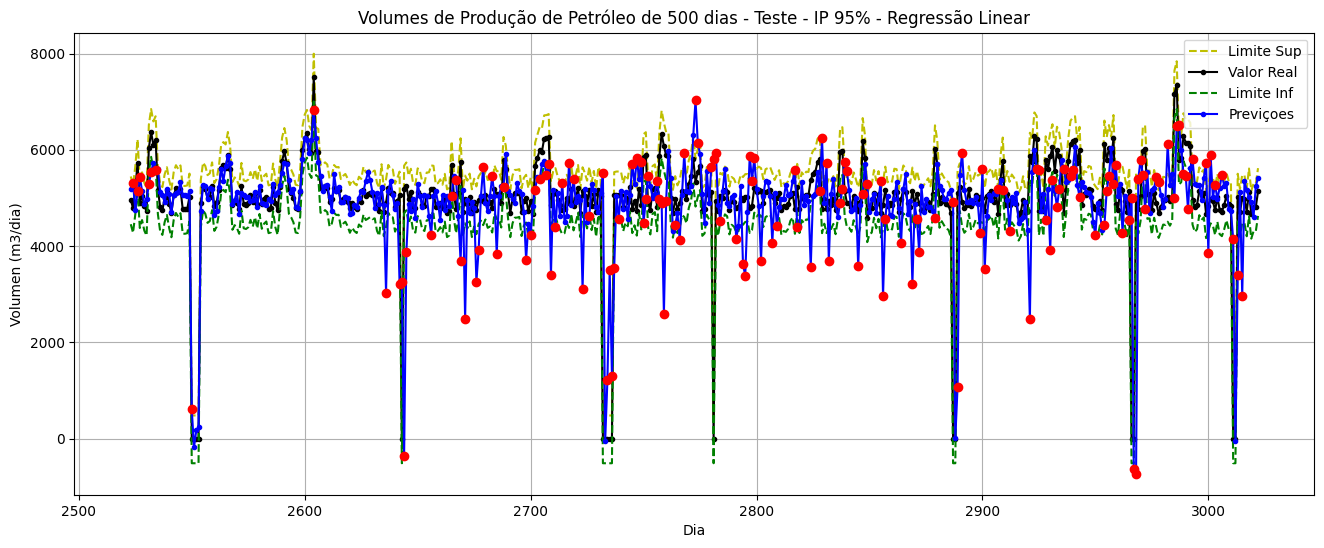

In [28]:
plt.figure(figsize=(16,6))
plt.plot(data.superior_95[2523:3023], '--y')
plt.plot(data.real[2523:3023], '.-k')
plt.plot(data.inferior_95[2523:3023], '--g')
plt.plot(data.pred[2523:3023], '.-b')
for i in range(len(outpred500_pi_95)):
    plt.plot(outpred500_pi_95.index[i], outpred500_pi_95['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo de 500 dias - Teste - IP 95% - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend(['Limite Sup', 'Valor Real', 'Limite Inf', 'Previçoes'])
plt.grid()
plt.show()

## 90% IC

In [29]:
data_pi_90_inf = data[data['diff'] < pi_90[0]]
data_pi_90_inf

,real,pred,diff,inferior_95,superior_95
51,0.000000,763.742384,-763.742384,-508.248178,483.470414
67,6538.232364,7029.934808,-491.702444,6029.984186,7021.702778
107,6096.979718,6527.898837,-430.919119,5588.731540,6580.450132
111,6161.400103,6593.502262,-432.102159,5653.151925,6644.870517
173,0.000000,645.444682,-645.444682,-508.248178,483.470414
...,...,...,...,...,...
3005,4757.208753,5208.748351,-451.539598,4248.960575,5240.679167
3006,4715.725601,5482.618254,-766.892653,4207.477423,5199.196015
3011,0.000000,4149.314559,-4149.314559,-508.248178,483.470414
3017,4713.676692,5163.249216,-449.572524,4205.428514,5197.147106


In [30]:
data_pi_90_sup = data[data['diff'] > pi_90[1]]
data_pi_90_sup

,real,pred,diff,inferior_95,superior_95
40,6638.207480,6189.436248,448.771232,6129.959302,7121.677894
143,6348.744326,5837.421315,511.323011,5840.496148,6832.214740
156,6648.366611,6187.166833,461.199778,6140.118433,7131.837025
229,6660.066012,6252.952131,407.113881,6151.817834,7143.536426
871,5358.809363,12.363491,5346.445872,4850.561185,5842.279777
...,...,...,...,...,...
2991,6149.800259,4765.899145,1383.901114,5641.552081,6633.270673
2992,6079.677510,5623.690332,455.987178,5571.429332,6563.147924
3000,4835.124735,3862.234256,972.890479,4326.876557,5318.595149
3013,5019.713217,3396.851642,1622.861575,4511.465039,5503.183631


In [31]:
data_pi_90 = pd.concat([data_pi_90_inf, data_pi_90_sup])
data_pi_90

,real,pred,diff,inferior_95,superior_95
51,0.000000,763.742384,-763.742384,-508.248178,483.470414
67,6538.232364,7029.934808,-491.702444,6029.984186,7021.702778
107,6096.979718,6527.898837,-430.919119,5588.731540,6580.450132
111,6161.400103,6593.502262,-432.102159,5653.151925,6644.870517
173,0.000000,645.444682,-645.444682,-508.248178,483.470414
...,...,...,...,...,...
2991,6149.800259,4765.899145,1383.901114,5641.552081,6633.270673
2992,6079.677510,5623.690332,455.987178,5571.429332,6563.147924
3000,4835.124735,3862.234256,972.890479,4326.876557,5318.595149
3013,5019.713217,3396.851642,1622.861575,4511.465039,5503.183631


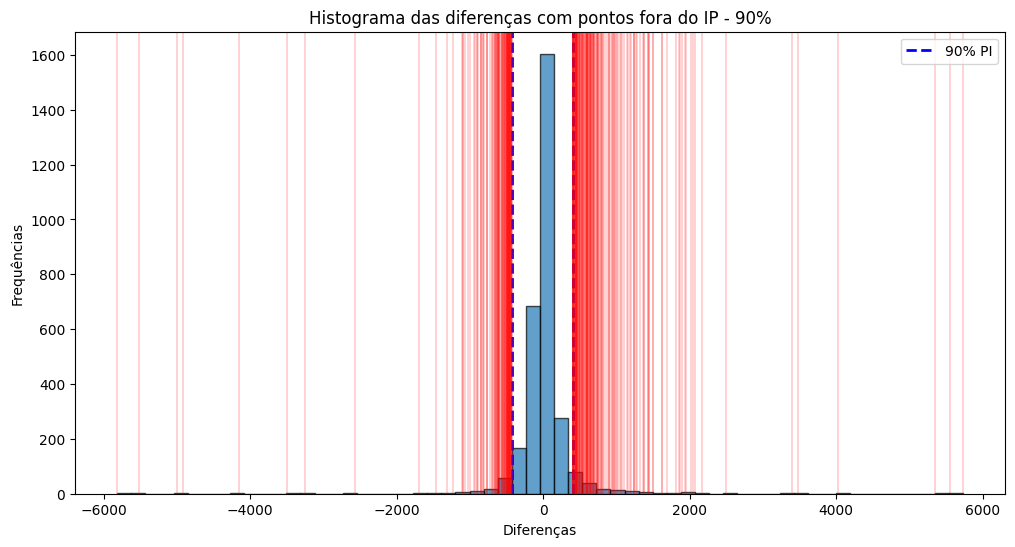

In [32]:
plt.figure(figsize=(12, 6))
plt.hist(data['diff'], bins=60, edgecolor='k', alpha=0.7)
plt.axvline(pi_90[0], color='blue', linestyle='dashed', linewidth=2, label='90% PI')
plt.axvline(pi_90[1], color='blue', linestyle='dashed', linewidth=2)
for d in data_pi_90['diff']:
  plt.axvline(d, color='red', linewidth=0.25)
plt.title('Histograma das diferenças com pontos fora do IP - 90%')
plt.xlabel('Diferenças')
plt.ylabel('Frequências')
plt.legend()
plt.show()

In [33]:
p = len(data_pi_90)/len(data)*100
print('percentual de pontos que caem fora do intervalo de previsão de 90 %:')
print(f'{p} %')


percentual de pontos que caem fora do intervalo de previsão de 90 %:
8.567648031756534 %


In [34]:
outpred500_pi_90 = data_pi_90[(data_pi_90.index >= 2523) & (data_pi_90.index <= 3023)]
outpred500_pi_90

,real,pred,diff,inferior_95,superior_95
2524,4786.483783,5311.781088,-525.297305,4278.235605,5269.954197
2527,4885.716662,5430.478911,-544.762249,4377.468484,5369.187076
2535,5176.037246,5611.478004,-435.440758,4667.789068,5659.507660
2550,0.000000,609.362075,-609.362075,-508.248178,483.470414
2628,5079.446200,5533.614368,-454.168168,4571.198022,5562.916614
...,...,...,...,...,...
2991,6149.800259,4765.899145,1383.901114,5641.552081,6633.270673
2992,6079.677510,5623.690332,455.987178,5571.429332,6563.147924
3000,4835.124735,3862.234256,972.890479,4326.876557,5318.595149
3013,5019.713217,3396.851642,1622.861575,4511.465039,5503.183631


In [35]:
data['inferior_90'] = data['real'] + pi_90[0]
data['superior_90'] = data['real'] + pi_90[1]
data

,real,pred,diff,inferior_95,superior_95,inferior_90,superior_90
0,6200.376900,6503.854988,-303.478088,5692.128722,6683.847314,5773.053356,6602.922680
1,6250.402251,6223.516685,26.885566,5742.154073,6733.872665,5823.078707,6652.948031
2,6552.748635,6228.613738,324.134897,6044.500457,7036.219049,6125.425091,6955.294415
3,6124.770458,6328.756222,-203.985764,5616.522280,6608.240872,5697.446914,6527.316238
4,6343.576606,6343.064936,0.511670,5835.328428,6827.047020,5916.253062,6746.122386
...,...,...,...,...,...,...,...
3018,5128.181653,5022.920252,105.261401,4619.933475,5611.652067,4700.858109,5530.727433
3019,4664.154912,4912.009015,-247.854103,4155.906734,5147.625326,4236.831368,5066.700692
3020,4815.533061,4596.671417,218.861644,4307.284883,5299.003475,4388.209517,5218.078841
3021,4812.097524,5242.720324,-430.622800,4303.849346,5295.567938,4384.773980,5214.643304


In [36]:
outpred100_pi_90 = data_pi_90[(data_pi_90.index >= 2523) & (data_pi_90.index <= 2623)]
outpred100_pi_90

,real,pred,diff,inferior_95,superior_95
2524,4786.483783,5311.781088,-525.297305,4278.235605,5269.954197
2527,4885.716662,5430.478911,-544.762249,4377.468484,5369.187076
2535,5176.037246,5611.478004,-435.440758,4667.789068,5659.507660
2550,0.000000,609.362075,-609.362075,-508.248178,483.470414
2525,5167.045092,4746.870435,420.174657,4658.796914,5650.515506
2526,5732.918173,5137.313989,595.604184,5224.669995,6216.388587
2531,6033.178669,5286.032125,747.146544,5524.930491,6516.649083
2532,6363.129133,5541.335220,821.793913,5854.880955,6846.599547
2534,6213.277682,5589.296948,623.980734,5705.029504,6696.748096
2604,7512.353897,6836.293135,676.060762,7004.105719,7995.824311


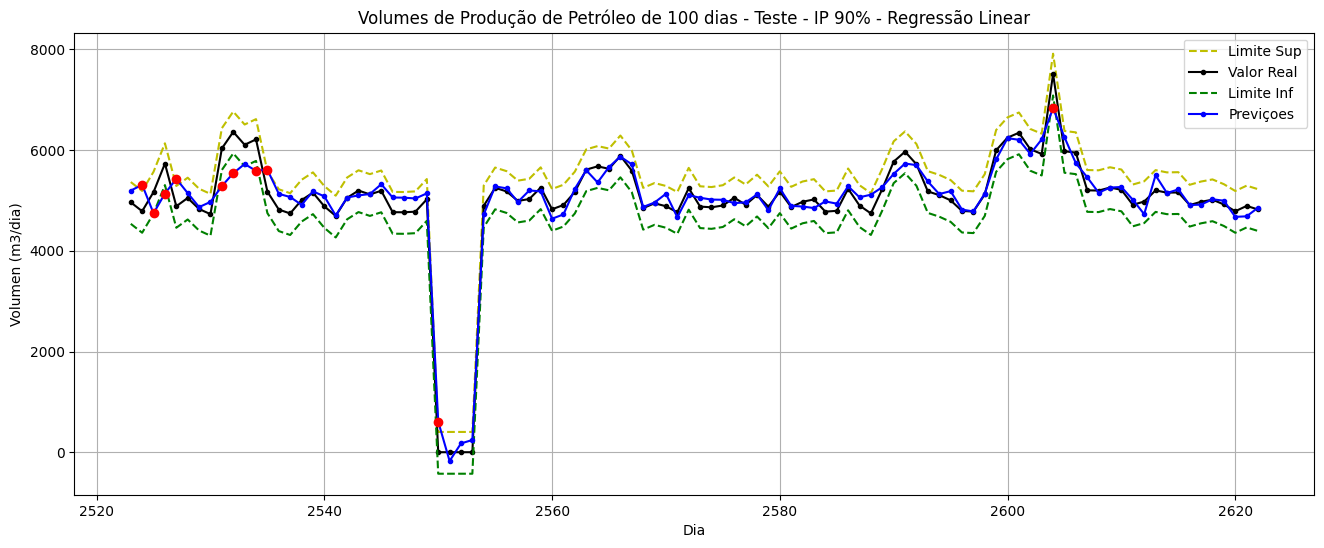

In [37]:
plt.figure(figsize=(16,6))
plt.plot(data.superior_90[2523:2623], '--y')
plt.plot(data.real[2523:2623], '.-k')
plt.plot(data.inferior_90[2523:2623], '--g')
plt.plot(data.pred[2523:2623], '.-b')
for i in range(len(outpred100_pi_90)):
    plt.plot(outpred100_pi_90.index[i], outpred100_pi_90['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo de 100 dias - Teste - IP 90% - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend(['Limite Sup', 'Valor Real', 'Limite Inf', 'Previçoes'])
plt.grid()
plt.show()

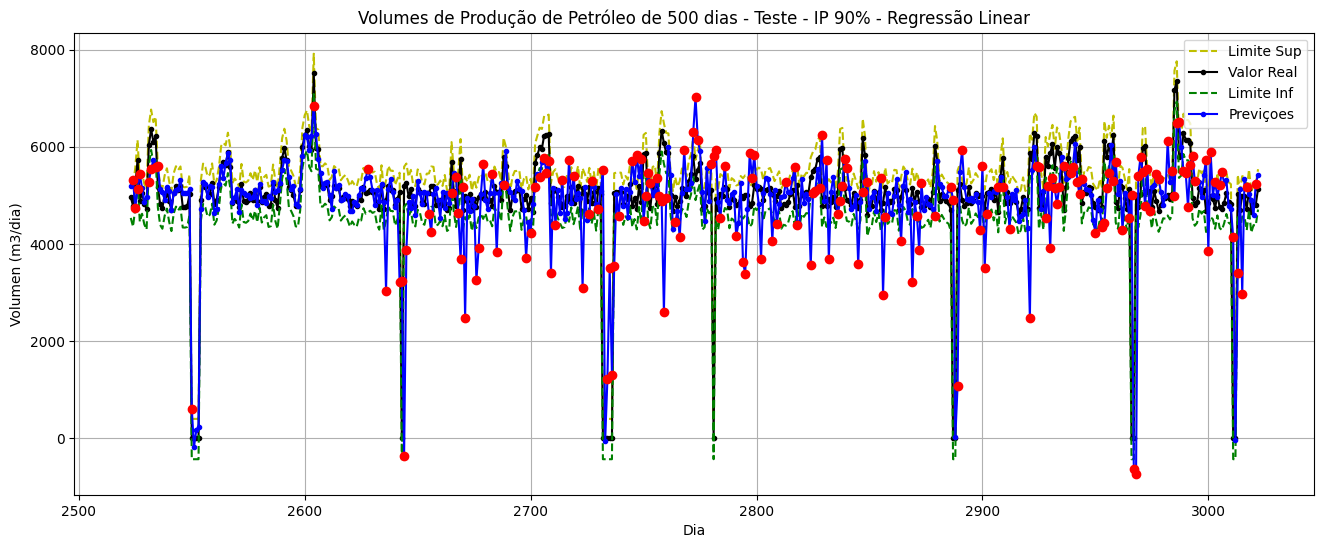

In [38]:
plt.figure(figsize=(16,6))
plt.plot(data.superior_90[2523:3023], '--y')
plt.plot(data.real[2523:3023], '.-k')
plt.plot(data.inferior_90[2523:3023], '--g')
plt.plot(data.pred[2523:3023], '.-b')
for i in range(len(outpred500_pi_90)):
    plt.plot(outpred500_pi_90.index[i], outpred500_pi_90['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo de 500 dias - Teste - IP 90% - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend(['Limite Sup', 'Valor Real', 'Limite Inf', 'Previçoes'])
plt.grid()
plt.show()

## 98% IC

In [39]:
data_pi_98_inf = data[data['diff'] < pi_98[0]]
data_pi_98_inf

,real,pred,diff,inferior_95,superior_95,inferior_90,superior_90
51,0.000000,763.742384,-763.742384,-508.248178,483.470414,-427.323544,402.545780
173,0.000000,645.444682,-645.444682,-508.248178,483.470414,-427.323544,402.545780
265,0.000000,619.635326,-619.635326,-508.248178,483.470414,-427.323544,402.545780
1829,5015.720161,5651.790133,-636.069972,4507.471983,5499.190575,4588.396617,5418.265941
1883,4877.288367,5489.482205,-612.193838,4369.040189,5360.758781,4449.964823,5279.834147
1893,5183.663969,5852.247888,-668.583919,4675.415791,5667.134383,4756.340425,5586.209749
2330,0.000000,2575.208526,-2575.208526,-508.248178,483.470414,-427.323544,402.545780
2478,4839.209548,5452.135983,-612.926435,4330.961370,5322.679962,4411.886004,5241.755328
2486,4802.326012,5486.011089,-683.685077,4294.077834,5285.796426,4375.002468,5204.871792
2550,0.000000,609.362075,-609.362075,-508.248178,483.470414,-427.323544,402.545780


In [40]:
data_pi_98_sup = data[data['diff'] > pi_98[1]]
data_pi_98_sup

,real,pred,diff,inferior_95,superior_95,inferior_90,superior_90
871,5358.809363,12.363491,5346.445872,4850.561185,5842.279777,4931.485819,5761.355143
1200,6563.550233,5927.937678,635.612555,6055.302055,7047.020647,6136.226689,6966.096013
1268,6532.731480,5795.380900,737.350580,6024.483302,7016.201894,6105.407936,6935.277260
1298,6466.365948,5828.046073,638.319875,5958.117770,6949.836362,6039.042404,6868.911728
1310,6016.216811,5408.854639,607.362172,5507.968633,6499.687225,5588.893267,6418.762591
...,...,...,...,...,...,...,...
2990,6149.491561,5451.811932,697.679629,5641.243383,6632.961975,5722.168017,6552.037341
2991,6149.800259,4765.899145,1383.901114,5641.552081,6633.270673,5722.476715,6552.346039
3000,4835.124735,3862.234256,972.890479,4326.876557,5318.595149,4407.801191,5237.670515
3013,5019.713217,3396.851642,1622.861575,4511.465039,5503.183631,4592.389673,5422.258997


In [41]:
data_pi_98 = pd.concat([data_pi_98_inf, data_pi_98_sup])
data_pi_98

,real,pred,diff,inferior_95,superior_95,inferior_90,superior_90
51,0.000000,763.742384,-763.742384,-508.248178,483.470414,-427.323544,402.545780
173,0.000000,645.444682,-645.444682,-508.248178,483.470414,-427.323544,402.545780
265,0.000000,619.635326,-619.635326,-508.248178,483.470414,-427.323544,402.545780
1829,5015.720161,5651.790133,-636.069972,4507.471983,5499.190575,4588.396617,5418.265941
1883,4877.288367,5489.482205,-612.193838,4369.040189,5360.758781,4449.964823,5279.834147
...,...,...,...,...,...,...,...
2990,6149.491561,5451.811932,697.679629,5641.243383,6632.961975,5722.168017,6552.037341
2991,6149.800259,4765.899145,1383.901114,5641.552081,6633.270673,5722.476715,6552.346039
3000,4835.124735,3862.234256,972.890479,4326.876557,5318.595149,4407.801191,5237.670515
3013,5019.713217,3396.851642,1622.861575,4511.465039,5503.183631,4592.389673,5422.258997


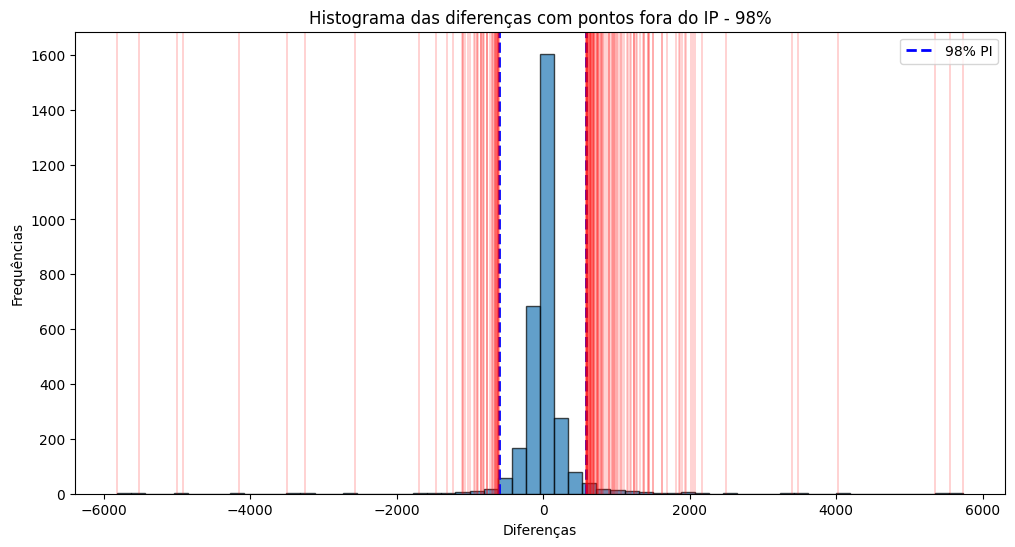

In [42]:
plt.figure(figsize=(12, 6))
plt.hist(data['diff'], bins=60, edgecolor='k', alpha=0.7)
plt.axvline(pi_98[0], color='blue', linestyle='dashed', linewidth=2, label='98% PI')
plt.axvline(pi_98[1], color='blue', linestyle='dashed', linewidth=2)
for d in data_pi_98['diff']:
  plt.axvline(d, color='red', linewidth=0.25)
plt.title('Histograma das diferenças com pontos fora do IP - 98%')
plt.xlabel('Diferenças')
plt.ylabel('Frequências')
plt.legend()
plt.show()

In [43]:
p = len(data_pi_98)/len(data)*100
print('percentual de pontos que caem fora do intervalo de previsão de 98 %:')
print(f'{p} %')


percentual de pontos que caem fora do intervalo de previsão de 98 %:
5.0942772080714525 %


In [44]:
outpred500_pi_98 = data_pi_98[(data_pi_98.index >= 2523) & (data_pi_98.index <= 3023)]
outpred500_pi_98

,real,pred,diff,inferior_95,superior_95,inferior_90,superior_90
2550,0.000000,609.362075,-609.362075,-508.248178,483.470414,-427.323544,402.545780
2643,0.000000,3247.467199,-3247.467199,-508.248178,483.470414,-427.323544,402.545780
2679,4944.858750,5639.654101,-694.795351,4436.610572,5428.329164,4517.535206,5347.404530
2683,4791.515725,5447.224409,-655.708684,4283.267547,5274.986139,4364.192181,5194.061505
2717,4886.056857,5731.368212,-845.311355,4377.808679,5369.527271,4458.733313,5288.602637
...,...,...,...,...,...,...,...
2990,6149.491561,5451.811932,697.679629,5641.243383,6632.961975,5722.168017,6552.037341
2991,6149.800259,4765.899145,1383.901114,5641.552081,6633.270673,5722.476715,6552.346039
3000,4835.124735,3862.234256,972.890479,4326.876557,5318.595149,4407.801191,5237.670515
3013,5019.713217,3396.851642,1622.861575,4511.465039,5503.183631,4592.389673,5422.258997


In [45]:
data['inferior_98'] = data['real'] + pi_98[0]
data['superior_98'] = data['real'] + pi_98[1]
data


,real,pred,diff,inferior_95,superior_95,inferior_90,superior_90,inferior_98,superior_98
0,6200.376900,6503.854988,-303.478088,5692.128722,6683.847314,5773.053356,6602.922680,5597.068866,6778.907170
1,6250.402251,6223.516685,26.885566,5742.154073,6733.872665,5823.078707,6652.948031,5647.094217,6828.932521
2,6552.748635,6228.613738,324.134897,6044.500457,7036.219049,6125.425091,6955.294415,5949.440601,7131.278905
3,6124.770458,6328.756222,-203.985764,5616.522280,6608.240872,5697.446914,6527.316238,5521.462424,6703.300728
4,6343.576606,6343.064936,0.511670,5835.328428,6827.047020,5916.253062,6746.122386,5740.268572,6922.106876
...,...,...,...,...,...,...,...,...,...
3018,5128.181653,5022.920252,105.261401,4619.933475,5611.652067,4700.858109,5530.727433,4524.873619,5706.711923
3019,4664.154912,4912.009015,-247.854103,4155.906734,5147.625326,4236.831368,5066.700692,4060.846878,5242.685182
3020,4815.533061,4596.671417,218.861644,4307.284883,5299.003475,4388.209517,5218.078841,4212.225027,5394.063331
3021,4812.097524,5242.720324,-430.622800,4303.849346,5295.567938,4384.773980,5214.643304,4208.789490,5390.627794


In [46]:
outpred100_pi_98 = data_pi_98[(data_pi_98.index >= 2523) & (data_pi_98.index <= 2623)]
outpred100_pi_98

,real,pred,diff,inferior_95,superior_95,inferior_90,superior_90
2550,0.000000,609.362075,-609.362075,-508.248178,483.470414,-427.323544,402.545780
2526,5732.918173,5137.313989,595.604184,5224.669995,6216.388587,5305.594629,6135.463953
2531,6033.178669,5286.032125,747.146544,5524.930491,6516.649083,5605.855125,6435.724449
2532,6363.129133,5541.335220,821.793913,5854.880955,6846.599547,5935.805589,6765.674913
2534,6213.277682,5589.296948,623.980734,5705.029504,6696.748096,5785.954138,6615.823462
2604,7512.353897,6836.293135,676.060762,7004.105719,7995.824311,7085.030353,7914.899677


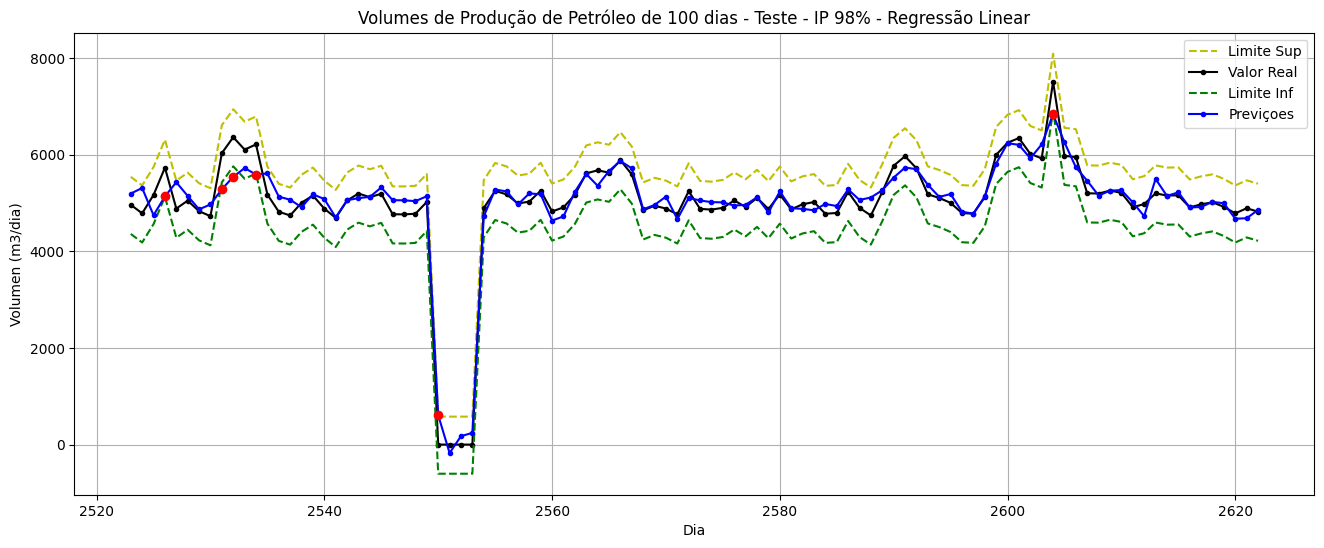

In [47]:
plt.figure(figsize=(16,6))
plt.plot(data.superior_98[2523:2623], '--y')
plt.plot(data.real[2523:2623], '.-k')
plt.plot(data.inferior_98[2523:2623], '--g')
plt.plot(data.pred[2523:2623], '.-b')
for i in range(len(outpred100_pi_98)):
    plt.plot(outpred100_pi_98.index[i], outpred100_pi_98['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo de 100 dias - Teste - IP 98% - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend(['Limite Sup', 'Valor Real', 'Limite Inf', 'Previçoes'])
plt.grid()
plt.show()

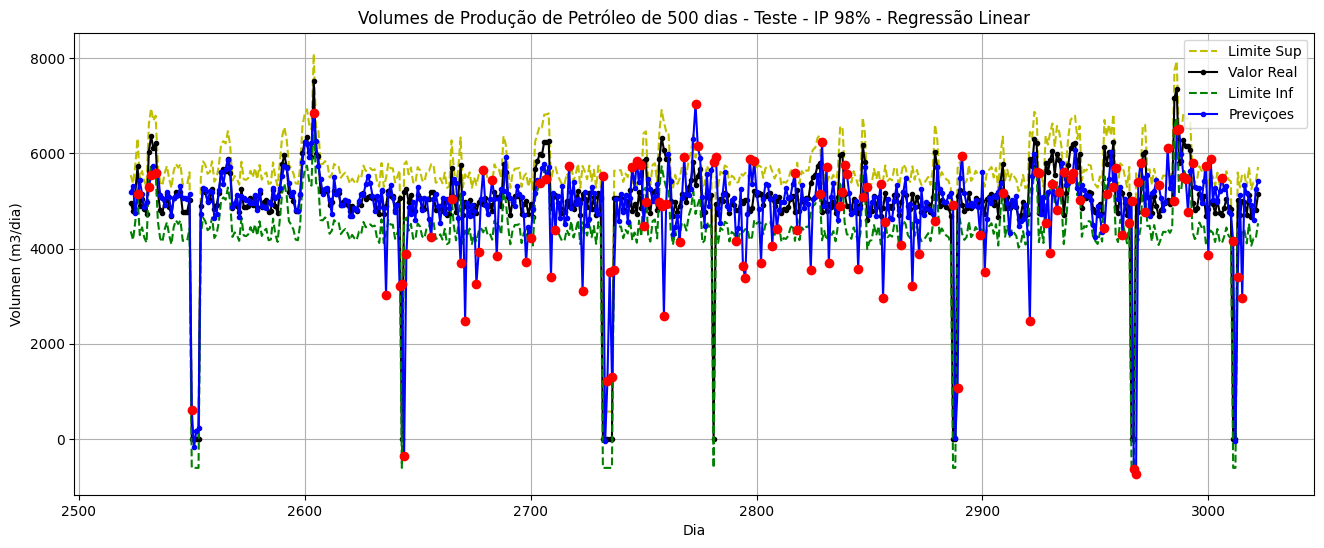

In [48]:
plt.figure(figsize=(16,6))
plt.plot(data.superior_98[2523:3023], '--y')
plt.plot(data.real[2523:3023], '.-k')
plt.plot(data.inferior_98[2523:3023], '--g')
plt.plot(data.pred[2523:3023], '.-b')
for i in range(len(outpred500_pi_98)):
    plt.plot(outpred500_pi_98.index[i], outpred500_pi_98['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo de 500 dias - Teste - IP 98% - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend(['Limite Sup', 'Valor Real', 'Limite Inf', 'Previçoes'])
plt.grid()
plt.show()

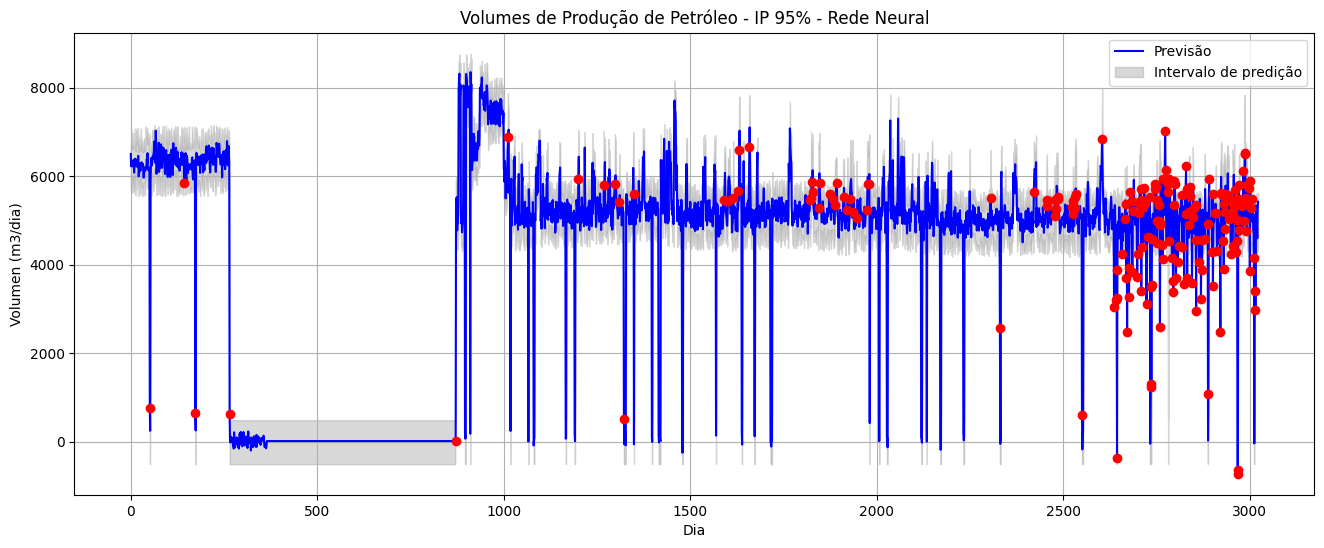

In [49]:
plt.figure(figsize=(16,6))
plt.plot(data.index, data['pred'], label='Previsão', color='blue')

plt.fill_between(data.index, data['inferior_95'], data['superior_95'], color='gray', alpha=0.3, label='Intervalo de predição')
for i in range(len(data_pi_95)):
    plt.plot(data_pi_95.index[i], data_pi_95['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo - IP 95% - Rede Neural')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend()

plt.grid()
plt.show()

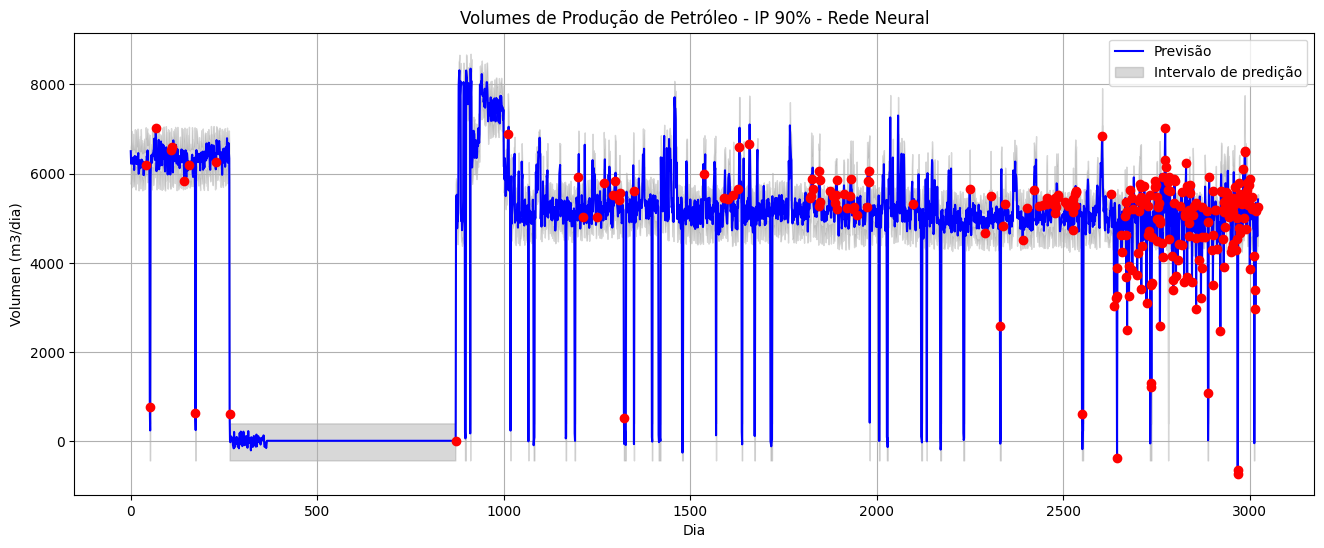

In [50]:
plt.figure(figsize=(16,6))
plt.plot(data.index, data['pred'], label='Previsão', color='blue')

plt.fill_between(data.index, data['inferior_90'], data['superior_90'], color='gray', alpha=0.3, label='Intervalo de predição')
for i in range(len(data_pi_90)):
    plt.plot(data_pi_90.index[i], data_pi_90['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo - IP 90% - Rede Neural')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend()

plt.grid()
plt.show()

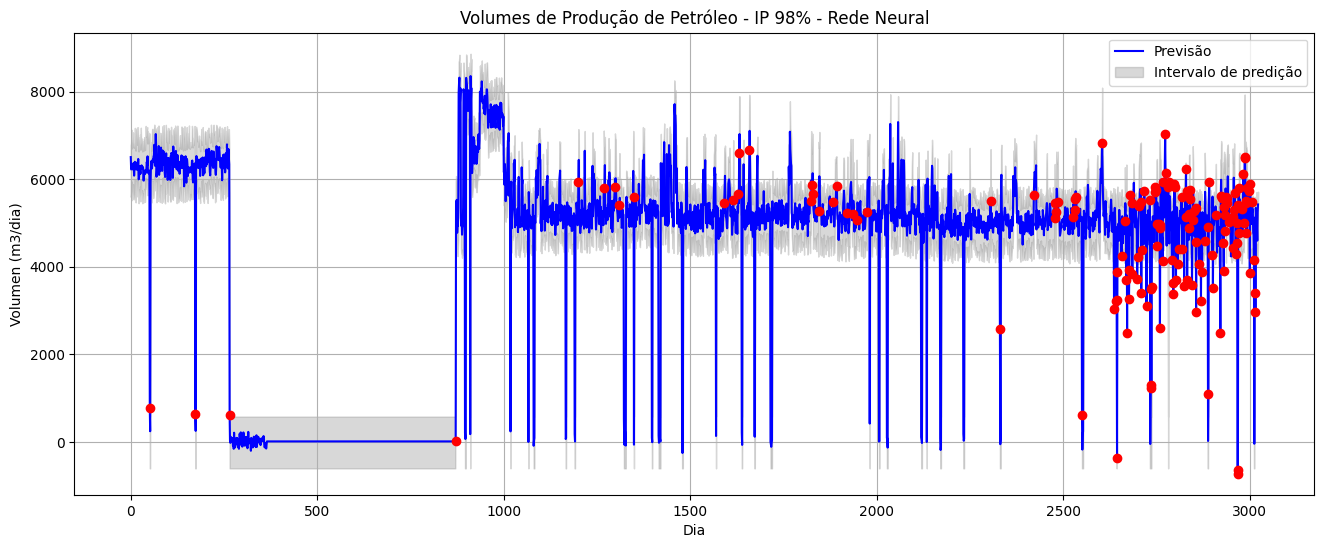

In [51]:
plt.figure(figsize=(16,6))
plt.plot(data.index, data['pred'], label='Previsão', color='blue')

plt.fill_between(data.index, data['inferior_98'], data['superior_98'], color='gray', alpha=0.3, label='Intervalo de predição')
for i in range(len(data_pi_98)):
    plt.plot(data_pi_98.index[i], data_pi_98['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo - IP 98% - Rede Neural')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend()

plt.grid()
plt.show()